In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

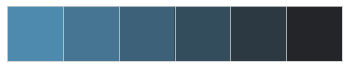

In [32]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
moscow = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(moscow),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [2]:
data = pd.read_csv('../data/buildings_train.csv')
metadata = pd.read_json('../data/buildings_meta.json')

In [3]:
data.head()

,id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,264,0.0,55.518117,37.355139,11.0,улица 1-я Нововатутинская,3,2019.0,2.0,12.0,1.0,1.0,1.0,0.0,1.0,3.0
1,6079,0.0,55.641920,37.352156,7.0,мкр. 10-й,к1014,1981.0,3.0,22.0,0.0,1.0,1.0,NaN,1.0,0.0
2,5829,0.0,55.770011,37.386220,7.0,Рублевское шоссе,68,2002.0,3.0,24.0,0.0,1.0,1.0,NaN,NaN,0.0
3,5758,0.0,55.739934,37.426070,7.0,Рублевское шоссе,93К2,2011.0,3.0,17.0,0.0,1.0,1.0,NaN,1.0,0.0
4,6761,0.0,55.649921,37.467994,7.0,улица Академика Анохина,58К2,2005.0,3.0,22.0,0.0,1.0,1.0,NaN,0.0,0.0


In [4]:
metadata

,name,type,desc,cats
0,id,integer_id,Unique ID of building for joining with apartments,NaN
1,new,boolean,Whether it is an old or new building,NaN
2,latitude,real,Latitude coordinate of building,NaN
3,longitude,real,Longitude coordinate of building,NaN
4,district,categorical,Administriative district within Moscow,"[Central, North, North-East, East, South-East,..."
5,street,string,Bulding street name,NaN
6,address,string,Building address (within street),NaN
7,constructed,integer,Year when the building was constructed,NaN
8,material,categorical,Primary building material used in building,"[Bricks, Wood, Monolith, Panel, Block, Monolit..."
9,stories,integer,Total number of floors in the building,NaN


In [31]:
data.describe()

,apartment_id,price,building_id,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
count,23285.000000,2.328500e+04,23285.000000,23021.000000,23285.000000,23285.000000,23155.000000,22491.000000,19313.000000,23285.000000,22928.000000,22928.000000,22928.000000,16497.000000,14474.000000,15124.000000
mean,11642.000000,2.355617e+07,4844.089156,0.337692,55.728337,37.583425,4.654848,2002.729581,2.203956,17.608933,0.392620,0.929867,0.743109,0.572589,0.806411,0.176012
std,6721.944845,5.264393e+07,2790.676698,0.472933,0.101831,0.150181,3.155835,22.948365,1.021101,11.216638,0.488344,0.255376,0.436928,0.549630,0.395124,0.566275
min,0.000000,9.000000e+05,0.000000,0.000000,55.211430,36.864371,0.000000,1855.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5821.000000,7.490000e+06,2426.000000,0.000000,55.664837,37.497827,2.000000,1989.000000,2.000000,9.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,11642.000000,1.064500e+07,4772.000000,0.000000,55.738622,37.571938,5.000000,2013.000000,2.000000,16.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,17463.000000,2.050000e+07,7340.000000,1.000000,55.797458,37.671085,7.000000,2020.000000,3.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,23284.000000,2.600000e+09,9735.000000,1.000000,56.006507,37.950668,11.000000,2023.000000,6.000000,95.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


# Correlations

<AxesSubplot:>

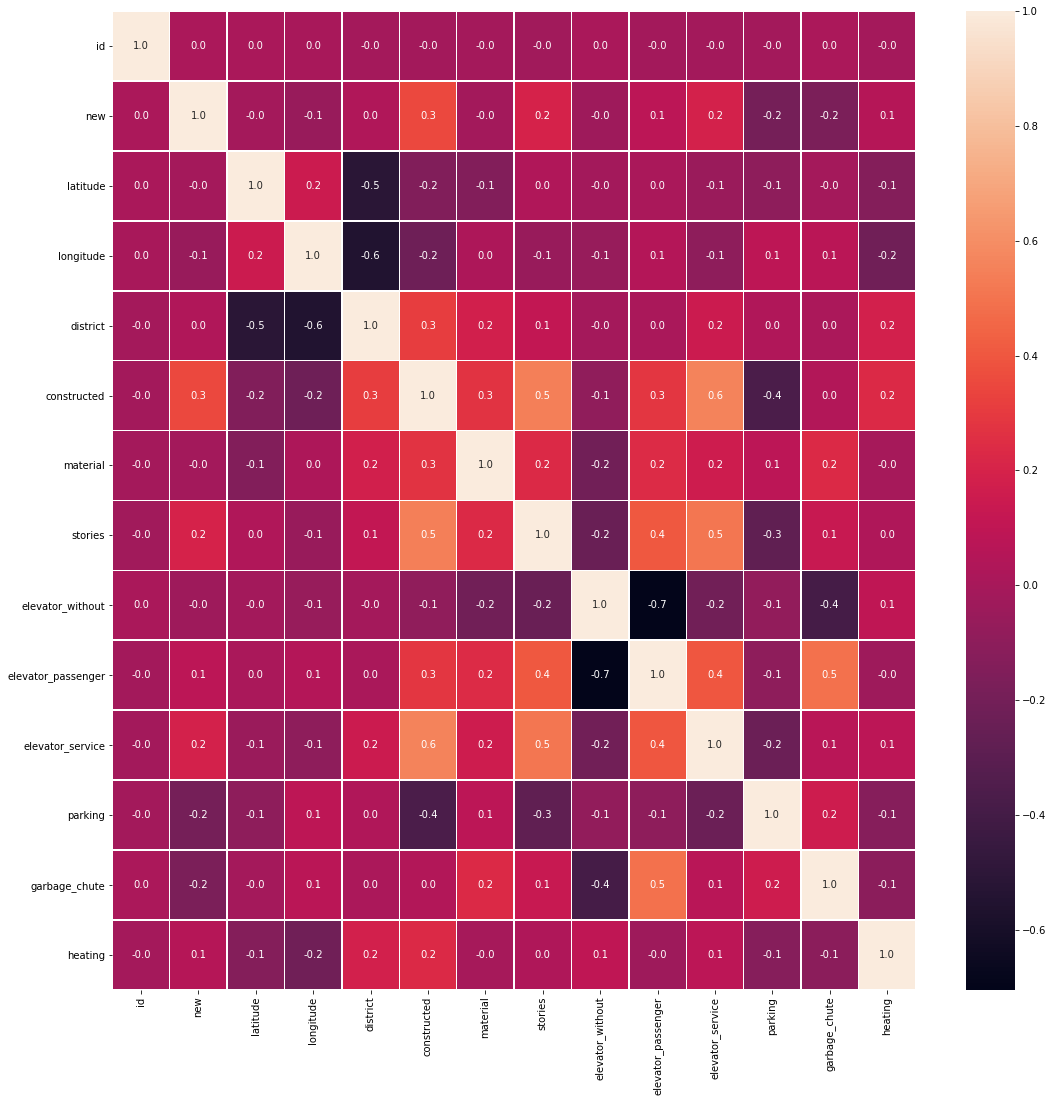

In [6]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Merge buildings and appartments data to obtain price

In [52]:
train_apartment = pd.read_csv('../data/apartments_train.csv')
train_building = pd.read_csv('../data/buildings_train.csv')
train = pd.merge(train_apartment, train_building, left_on='building_id', right_on='id')
#train.rename(columns={'id_x' : 'apartment_id', 'id_y' : 'building_id'}, inplace=True)
train.rename(columns={'id_x' : 'apartment_id'}, inplace=True)
train.drop('id_y', axis=1, inplace=True)
# Remove duplicate column after merge.

In [13]:
train.head()
print(train.columns)

Index(['apartment_id', 'seller', 'price', 'area_total', 'area_kitchen',
       'area_living', 'floor', 'rooms', 'layout', 'ceiling',
       'bathrooms_shared', 'bathrooms_private', 'windows_court',
       'windows_street', 'balconies', 'loggias', 'condition', 'phones',
       'building_id', 'new', 'latitude', 'longitude', 'district', 'street',
       'address', 'constructed', 'material', 'stories', 'elevator_without',
       'elevator_passenger', 'elevator_service', 'parking', 'garbage_chute',
       'heating'],
      dtype='object')


In [16]:
list = ['seller', 'area_total', 'area_kitchen',
       'area_living', 'floor', 'rooms', 'layout', 'ceiling',
       'bathrooms_shared', 'bathrooms_private', 'windows_court',
       'windows_street', 'balconies', 'loggias', 'condition', 'phones']
data = train.drop(list, axis=1)
data.tail()

,apartment_id,price,building_id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
23280,23228,12500000.0,8621,0.0,55.468208,37.289436,10.0,бульвар Троицкий,3,2016.0,NaN,6.0,0.0,1.0,1.0,NaN,NaN,0.0
23281,23229,5250000.0,694,0.0,55.476128,37.295266,10.0,проспект Октябрьский,9,1991.0,4.0,16.0,0.0,1.0,0.0,NaN,1.0,0.0
23282,23248,13500000.0,5758,0.0,55.739934,37.426070,7.0,Рублевское шоссе,93К2,2011.0,3.0,17.0,0.0,1.0,1.0,NaN,1.0,0.0
23283,23250,18900000.0,2857,NaN,55.534816,37.526313,6.0,Южнобутовская улица,75,2001.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
23284,23271,10890000.0,6761,0.0,55.649921,37.467994,7.0,улица Академика Анохина,58К2,2005.0,3.0,22.0,0.0,1.0,1.0,NaN,0.0,0.0


In [17]:
x = data.drop('price', axis=1)
y = data['price']

# Price Distribution

In [18]:
sns.set_style("whitegrid")

In [29]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.histplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


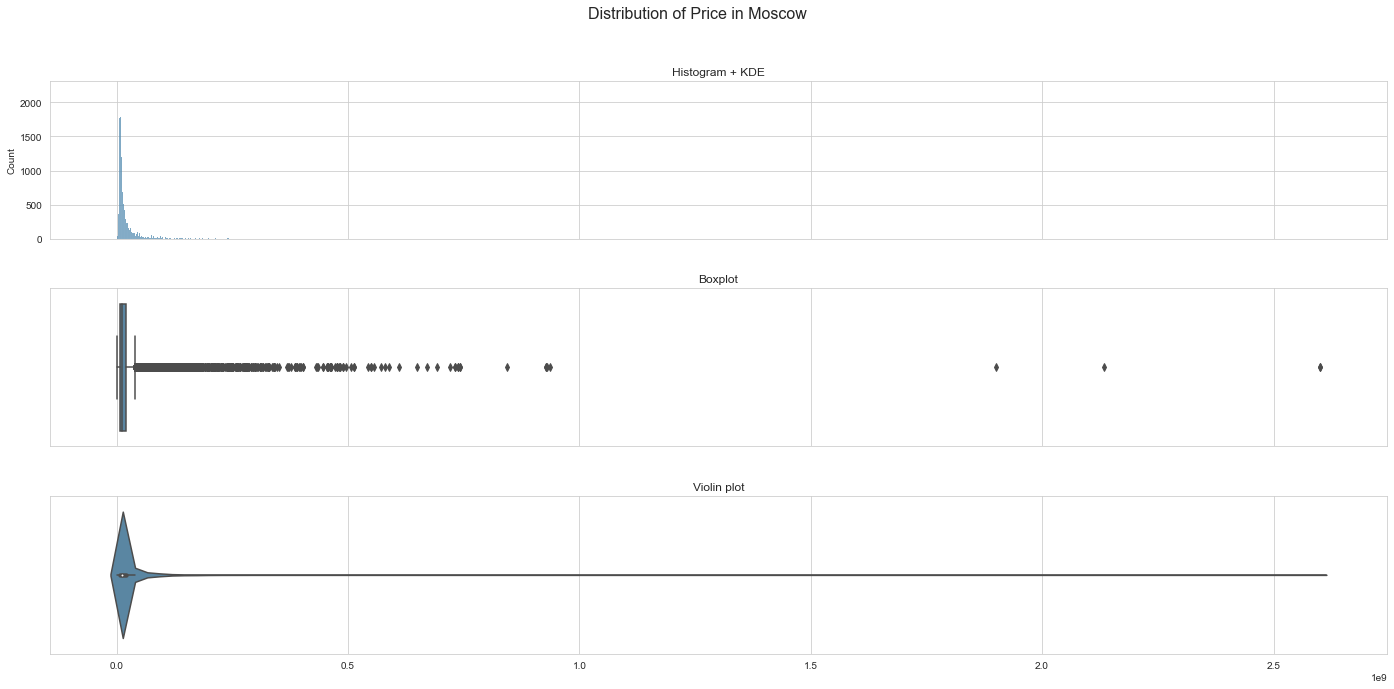

In [30]:
triple_plot(data['price'],'Distribution of Price in Moscow',"#4e89ae")

# New and resale properties

In [50]:
def count_plot(data,title,p):
    df5=data[data['new']== 1]
    df6=data[data['new']== 0]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='district', data=df5, ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='district', data=df6, ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()
    
def count_plot_ordered(data,title,p):
    df5=data[data['new']== 1]
    df6=data[data['new']== 0]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='district', data=df5, order=df5.district.value_counts().index[:10], ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='district', data=df6, order=df6.district.value_counts().index[:10], ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()
    


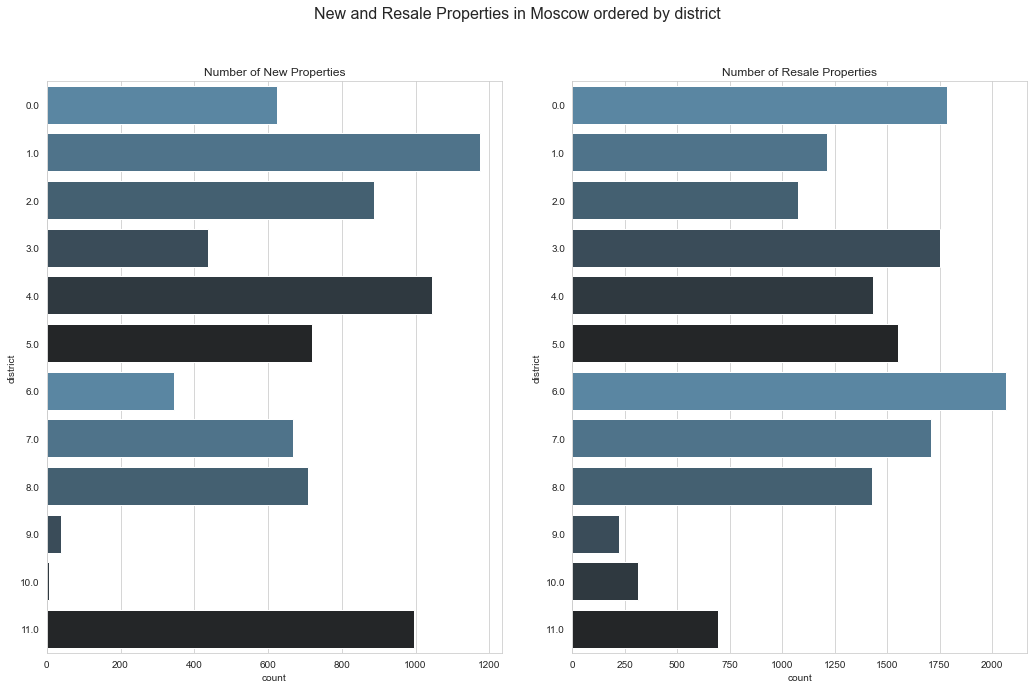

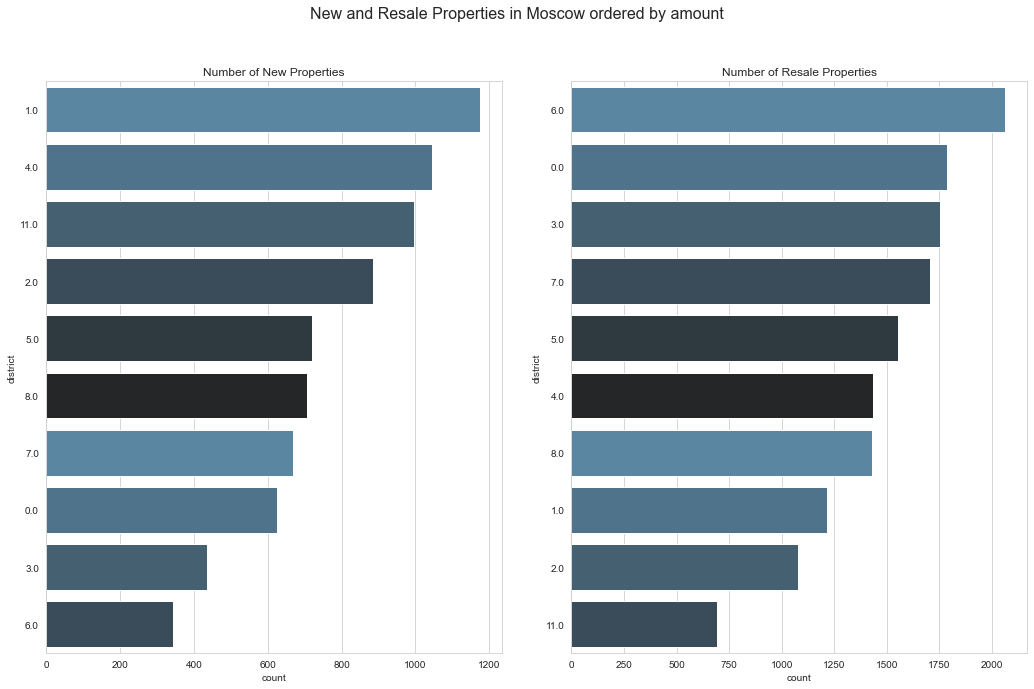

In [51]:
count_plot(x,'New and Resale Properties in Moscow ordered by district',moscow)
count_plot_ordered(x,'New and Resale Properties in Moscow ordered by amount',moscow)

# Categories vs price

In [58]:
def cat_plot(data,xlabel,p):
    sns.catplot(x=xlabel, y="price", data=data,palette = p)
    plt.title(xlabel + ' vs Price in Moscow',size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

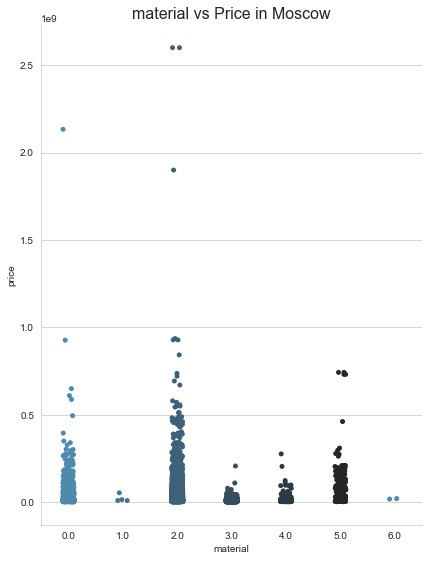

In [59]:
cat_plot(data,'material',moscow)
materials_legend = {0:"Bricks", 1:"Wood", 2:"Monolith", 3:"Panel", 4:"Block", 5:"Monolithic_brick", 6:"Stalin_project"}

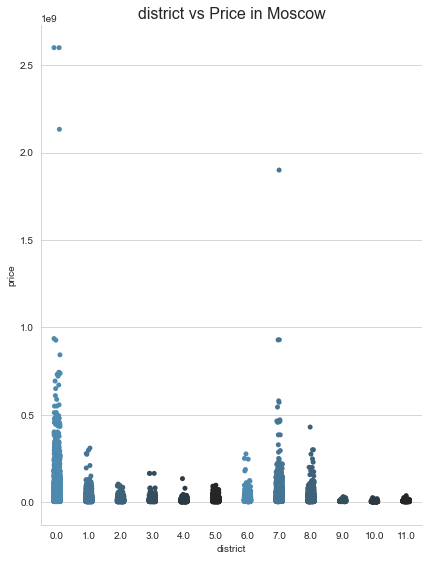

In [60]:
cat_plot(data,'district',moscow)
materials_legend = {0:"Central", 1:"North", 2:"North-East", 3:"East", 4:"South-East", 5:"South", 6:"South-West", 7:"West", 8:"North-West", 9:"Zelenograd", 10:"Troitsk", 11:"Novomoskovsk"}

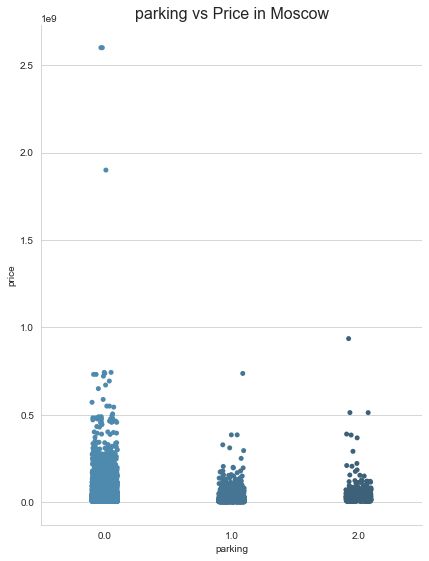

In [61]:
cat_plot(data,'parking',moscow)
materials_legend = {0:"Ground", 1:"Underground", 2:"Multilevel"}

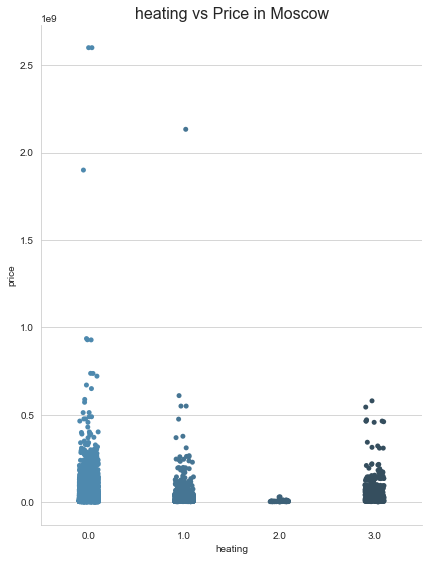

In [62]:
cat_plot(data,'heating',moscow)
materials_legend = {0:"Central", 1:"Individual", 2:"Boiler", 3:"Autonomous_boiler"}